In [2]:
# Load libraries and packages
import random
import numpy as np
import tensorflow as tf
import keras as K
from keras.layers import Dense
from keras.utils import np_utils
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

import keras
from tensorflow.keras.optimizers import SGD,Adam, Adadelta, RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import keras.backend as K
from keras.utils.np_utils import to_categorical


from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

In [3]:
df  = pd.read_csv('surface_faults.csv')
df .head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [4]:
df.keys()

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [5]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum()


X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [7]:
#y_var = df[:,'Pastry':'Other_Faults']
y_var = df[['Pastry','Z_Scratch','Stains','Dirtiness','Bumps','Other_Faults']]
df['targetVar'] = y_var.idxmax(axis=1)
df.drop(columns=['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults'], inplace=True)
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,targetVar
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


In [8]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,...,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,...,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,...,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,...,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,...,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,...,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000


In [9]:
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
targetVar                0
dtype: int64

In [10]:
Col = 4
if 27 % Col == 0 :
    Row = 27 // 4
else :
    Row = (27 // 4) + 1

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = Col*4
fig_size[1] = Row*4
plt.rcParams["figure.figsize"] = fig_size

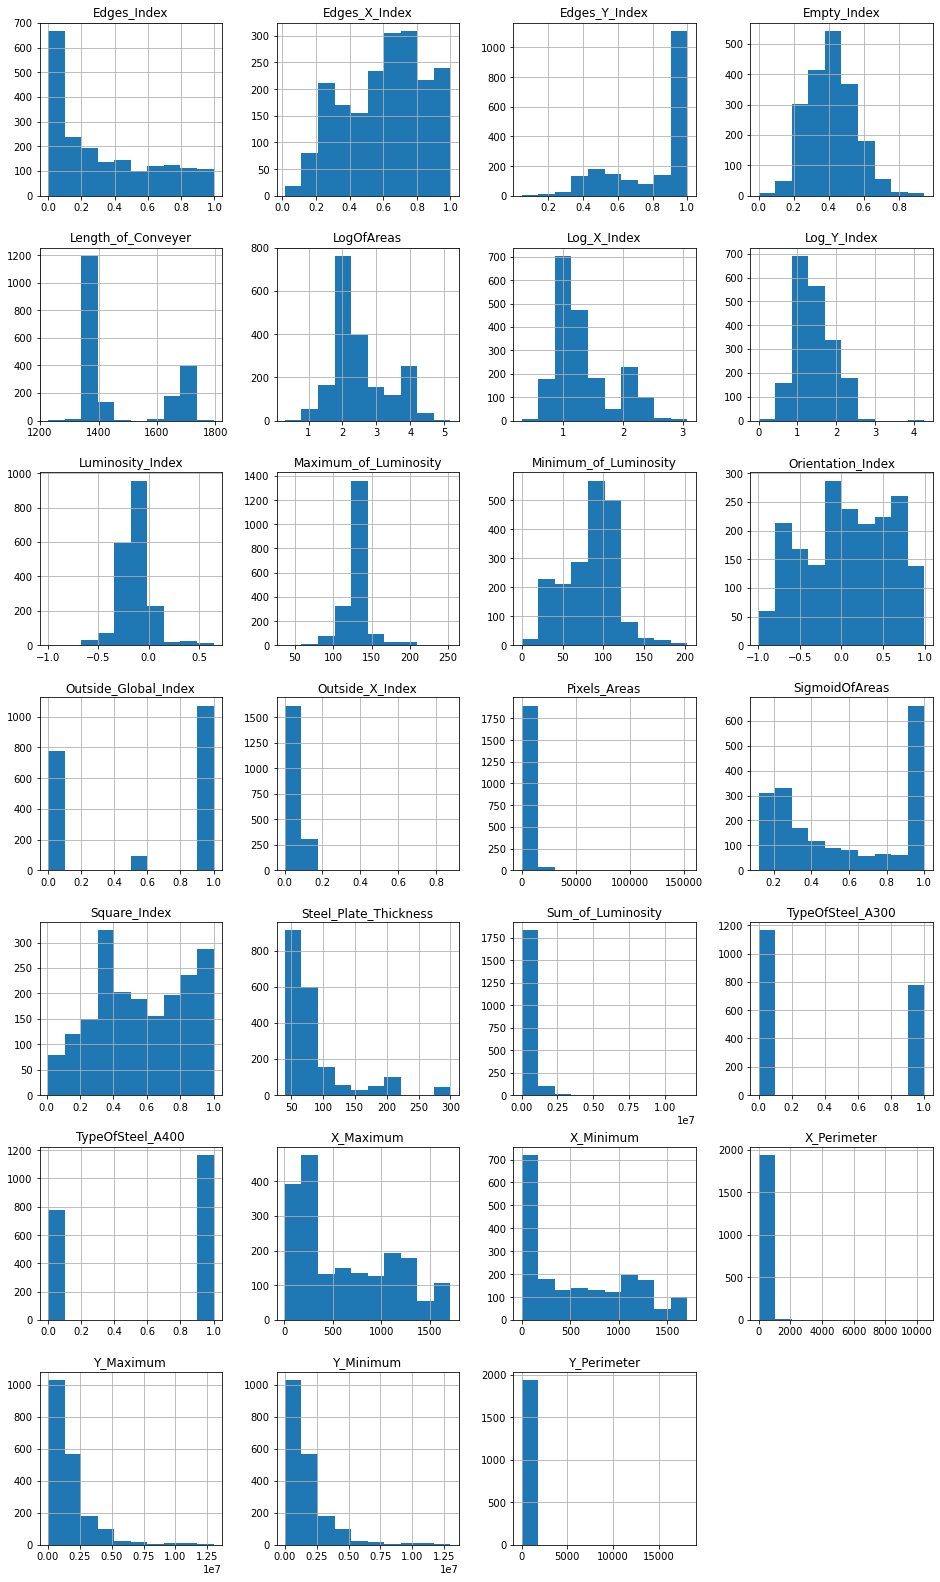

In [11]:
# Histograms for each feature before pre-processing
plt.rcParams["figure.figsize"] = fig_size
df.hist(layout=(7,4))
plt.show()

In [12]:
X = df.iloc[:,0:27]
Y = df.iloc[:,27]

In [13]:
#Xy_original.iloc[:,1:totCol]
#Xy_original.iloc[:,0]

In [14]:
X = X.astype(float)
preprocessing.scale(X, copy=False)
X.head(-10)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-1.016481,-1.141639,-0.777729,-0.777729,-0.314852,-0.314996,-0.091389,-0.355537,-0.266099,-1.187708,...,-0.486227,-0.575331,0.796401,0.879804,-0.083538,-0.898437,0.528872,1.467656,-1.075752,-0.009490
1,0.141894,0.066403,0.500188,0.500171,-0.345623,-0.338242,-0.124225,-0.380574,-0.017079,-0.384975,...,-0.504888,-0.043290,0.654223,0.879804,-0.581936,-1.157841,0.130174,1.417530,-0.297824,-0.845759
2,0.495362,0.436253,-0.054546,-0.054566,-0.352784,-0.344883,-0.150024,-0.387261,0.449832,-0.277944,...,-0.503191,0.573451,0.571820,0.879804,-0.812814,-1.157841,-0.325764,1.165103,0.057185,-1.091513
3,0.541467,0.486504,-0.722225,-0.722225,-0.332463,-0.328279,-0.089044,-0.365736,0.449832,-0.224429,...,-0.477744,-0.296153,0.796401,0.879804,-0.313021,-1.018897,0.550227,1.519978,-0.171419,-0.189237
4,1.379032,1.382988,-0.649678,-0.649559,0.099692,-0.172201,0.415209,0.079307,-1.480069,-0.224429,...,-0.352206,-1.345434,0.747301,0.879804,1.127655,-0.218461,2.216130,1.698514,-0.456503,1.221636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,0.925671,0.894545,-0.832794,-0.832808,-0.353364,-0.285109,-0.152369,-0.385806,1.103509,0.578304,...,-0.442118,-0.928929,0.796401,0.879804,-0.836650,-0.697186,-0.325764,0.721159,0.892936,-0.821007
1927,-0.789801,-0.900432,-0.787854,-0.787867,-0.347752,-0.291750,-0.140642,-0.377883,1.196891,0.631819,...,-0.442118,-0.796946,0.610673,0.879804,-0.641019,-0.697186,-0.134010,0.922861,1.077164,-0.645679
1928,1.405926,1.459370,-0.911655,-0.911665,-0.279048,-0.225334,-0.133606,-0.319481,-0.608501,-0.706068,...,-0.057020,1.320940,0.632021,-1.193905,0.206297,0.575537,-0.011825,-0.945578,-0.880093,1.198062
1929,-0.847432,-0.934603,-0.818988,-0.819003,-0.320077,-0.215372,-0.152369,-0.343997,1.041254,0.524788,...,-0.279257,-0.498033,0.559011,-1.193905,-0.142240,0.054028,-0.380362,-0.687359,0.753756,0.172026


In [15]:
X.shape

(1941, 27)

In [17]:
X.keys()

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

In [18]:
# Encode class values as integers and perform one-hot-encoding
encoder = preprocessing.LabelEncoder()
encoder.fit(Y)
y_transformed = encoder.transform(Y)
#y_encoded = np_utils.to_categorical(y_transformed)
#print(y_encoded)

In [19]:
# Encode class values as integers and perform one-hot-encoding
encoder = preprocessing.LabelEncoder()
encoder.fit(Y)
#y_encoded = np_utils.to_categorical(encoder.transform(Y))
#print(y_encoded)

LabelEncoder()

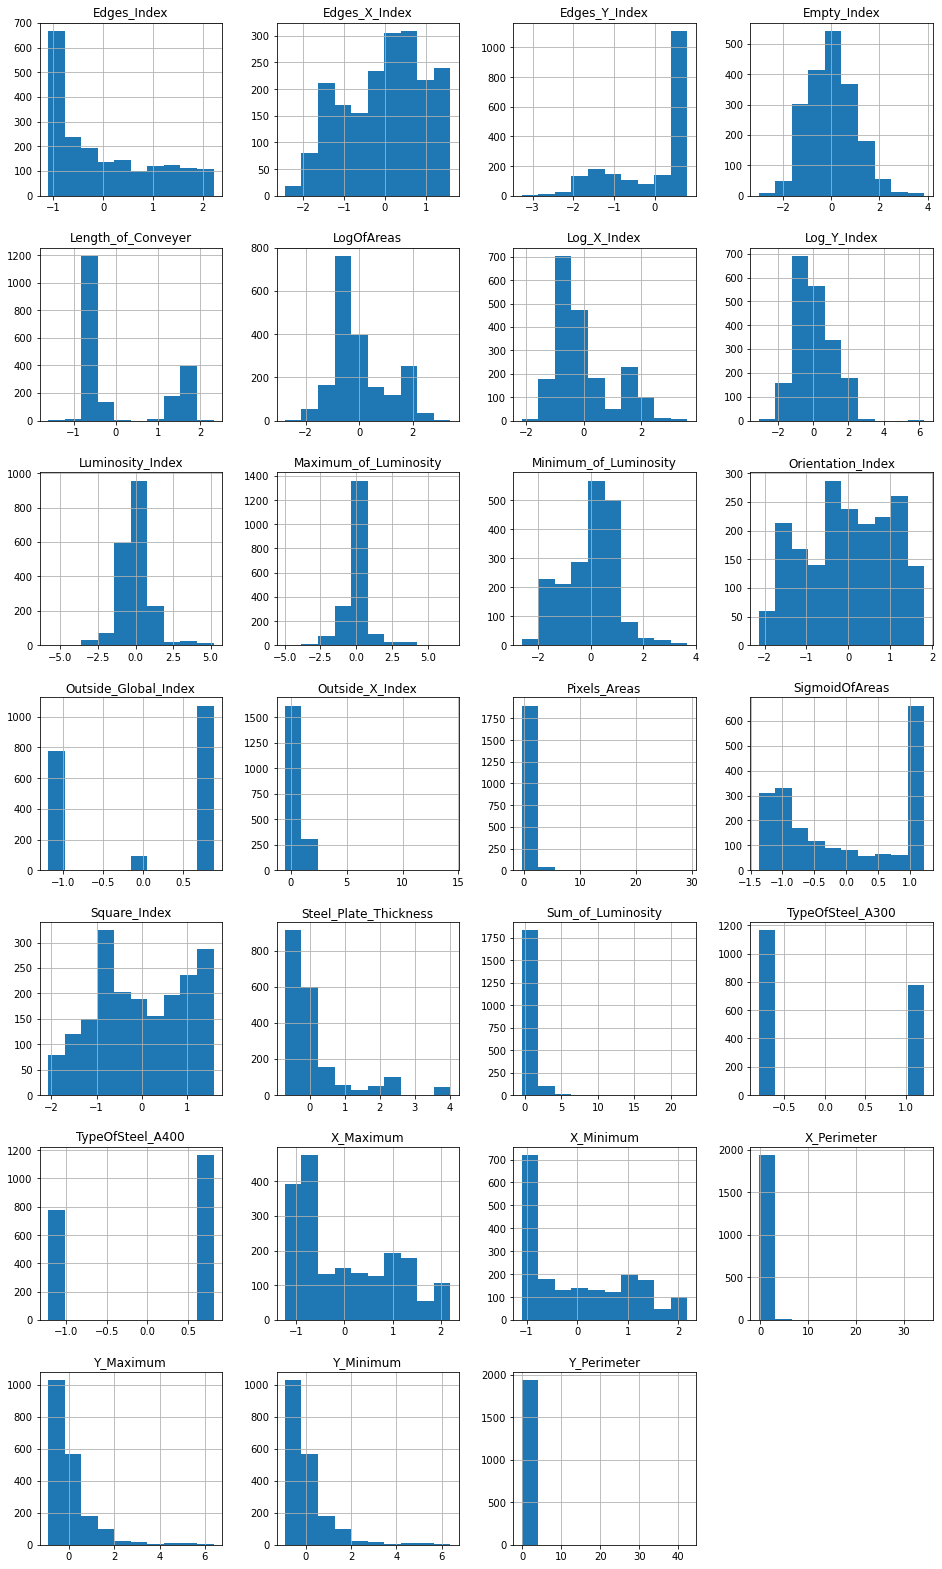

In [20]:
# Histograms for each attribute after pre-processing
X.hist(layout=(Row,Col))
plt.show()

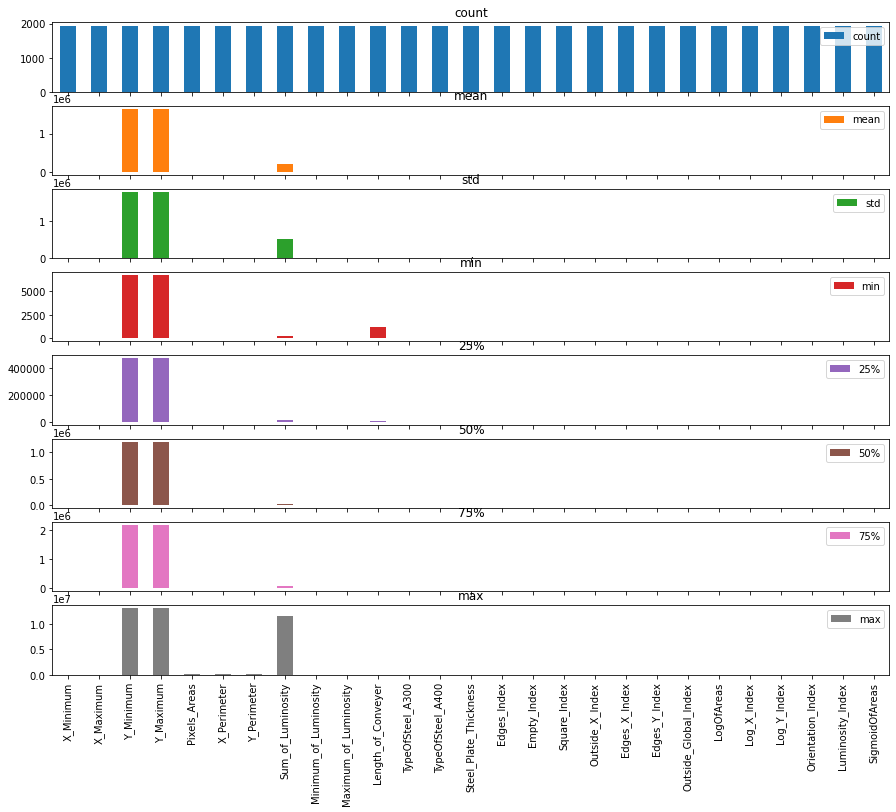

In [21]:
axes = df.describe().T.plot.bar(subplots=True, figsize=(15,12))

In [22]:
cols_const = [ col for col in df.columns if len(df[col].unique()) <= 2 ]
print('Columns with constant values: \n' + str(cols_const) + '\n')

Columns with constant values: 
['TypeOfSteel_A300', 'TypeOfSteel_A400']



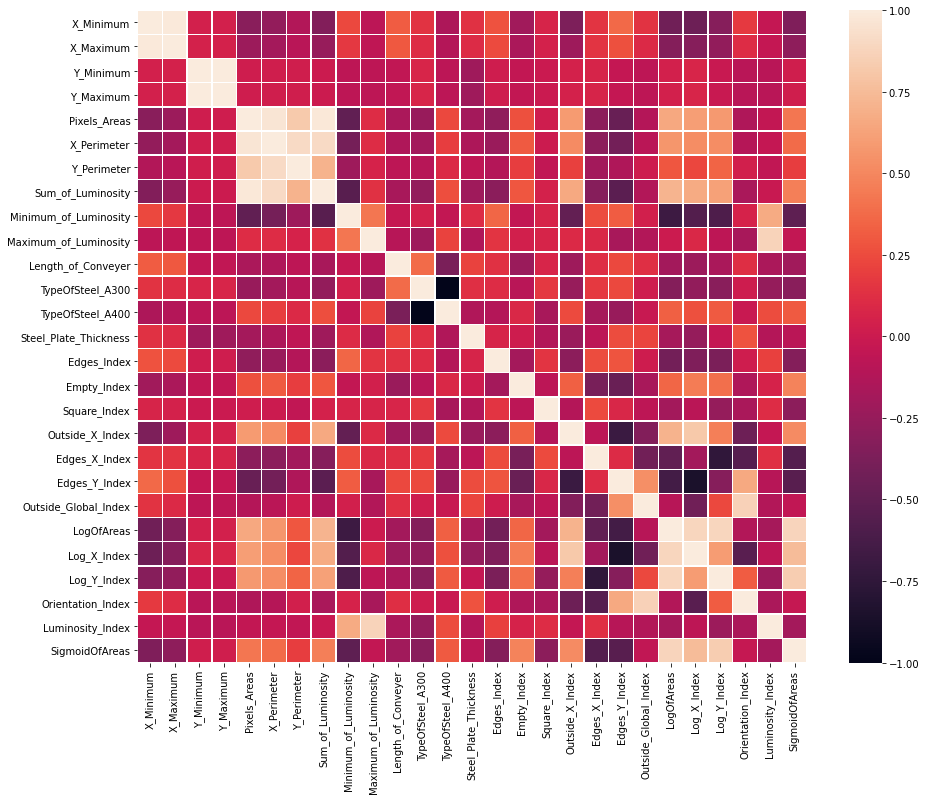

In [23]:
# print correlation heatmap
analysis_data_corr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(analysis_data_corr, linewidths=.5)

In [24]:
# print highly correlated values
analysis_data_corr2 = pd.DataFrame(np.tril(analysis_data_corr.values), columns=analysis_data_corr.columns, index = analysis_data_corr.index)

correlating = []
for col in analysis_data_corr2.columns:
    ser = analysis_data_corr2[col]
    idx = np.logical_or(-0.8 > ser,  ser > 0.8)
    for i, c in zip(ser[idx].index, ser[idx].values):
        if (i, col, c) not in correlating and i != col:
            correlating.append((col, i, c))

print('Highly correlating values:')
for c in correlating:
    print(c)

Highly correlating values:
('X_Minimum', 'X_Maximum', 0.9883135382418756)
('Y_Minimum', 'Y_Maximum', 0.999999972710473)
('Pixels_Areas', 'X_Perimeter', 0.9666440704235107)
('Pixels_Areas', 'Y_Perimeter', 0.827199212424962)
('Pixels_Areas', 'Sum_of_Luminosity', 0.9789516167596608)
('X_Perimeter', 'Y_Perimeter', 0.9124364588883507)
('X_Perimeter', 'Sum_of_Luminosity', 0.9129558373881583)
('Maximum_of_Luminosity', 'Luminosity_Index', 0.8701602321901937)
('TypeOfSteel_A300', 'TypeOfSteel_A400', -1.0)
('Outside_X_Index', 'Log_X_Index', 0.8202232538794252)
('Edges_Y_Index', 'Log_X_Index', -0.8554137483274171)
('Outside_Global_Index', 'Orientation_Index', 0.8626696996945462)
('LogOfAreas', 'Log_X_Index', 0.8889193995365805)
('LogOfAreas', 'Log_Y_Index', 0.8829740845525113)
('LogOfAreas', 'SigmoidOfAreas', 0.877768307828572)
('Log_Y_Index', 'SigmoidOfAreas', 0.838187844063448)


In [25]:

#After some try and error I selected some boxplots that will give some information about the amount 
#of outliers that we are facing:

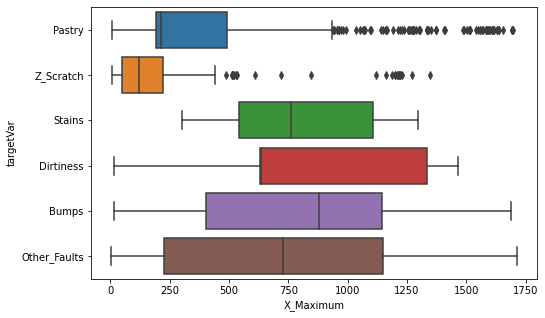

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot( y='targetVar',x='X_Maximum', data=df)

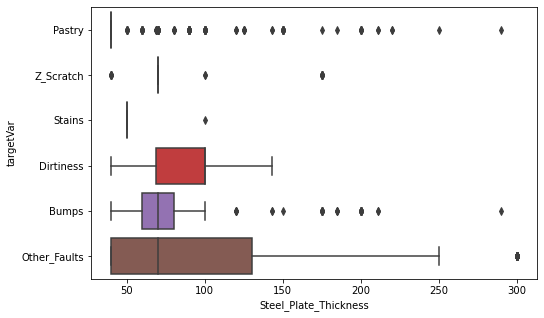

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(y='targetVar',x='Steel_Plate_Thickness', data=df)

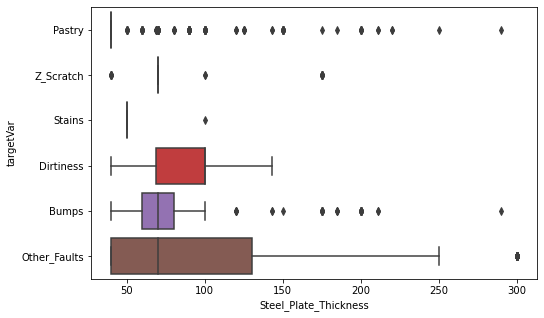

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot( y='targetVar',x='Steel_Plate_Thickness', data=df)

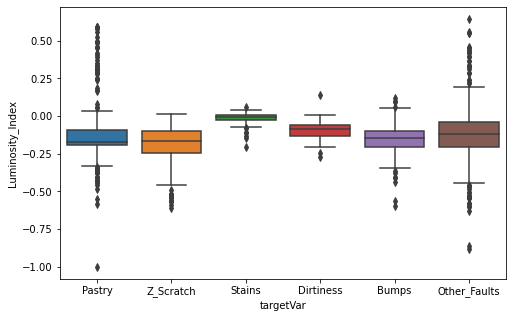

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(x='targetVar', y='Luminosity_Index', data=df)

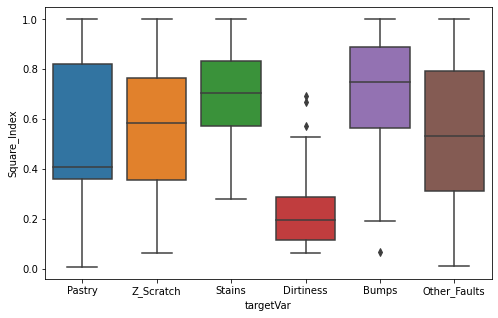

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x='targetVar', y='Square_Index', data=df)

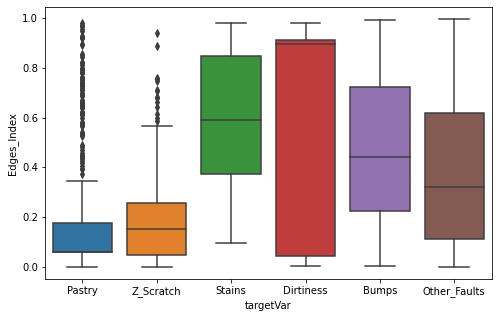

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x='targetVar', y='Edges_Index', data=df)

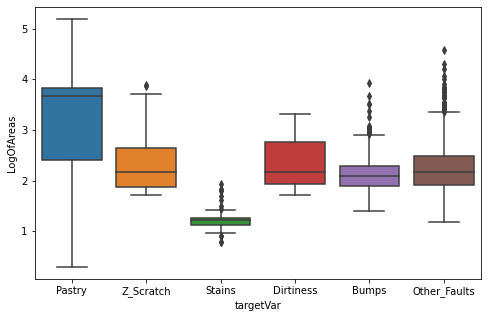

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x='targetVar', y='LogOfAreas', data=df)

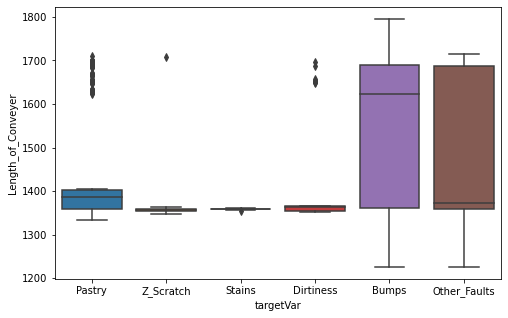

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x='targetVar', y='Length_of_Conveyer', data=df)

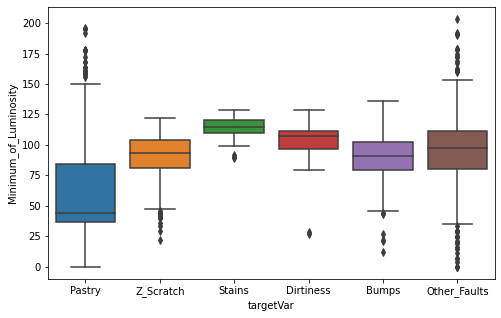

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='targetVar', y='Minimum_of_Luminosity', data=df)

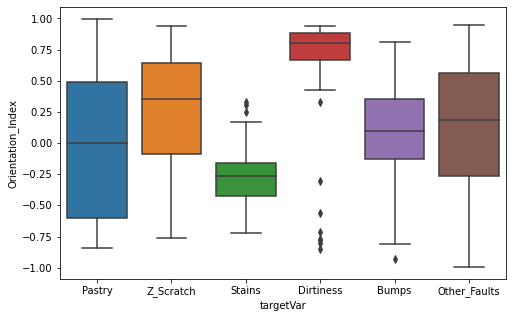

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(x='targetVar', y='Orientation_Index', data=df)


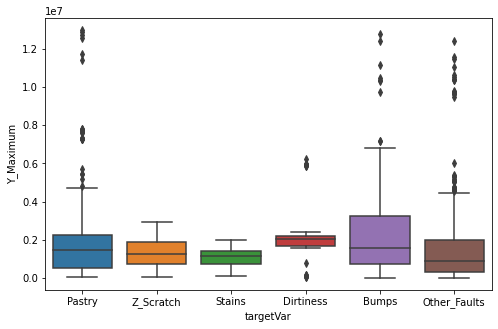

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(x='targetVar', y='Y_Maximum', data=df)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.3,random_state=50)

In [38]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=27))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))



In [39]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1792      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 6,407
Trainable params: 6,407
Non-trainable params: 0
_________________________________________________________________


C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [40]:
model.fit(X,y_transformed, verbose=1, epochs=100)

Epoch 1/100
61/61 [==============================] - 1s 2ms/step - loss: 1.4007 - accuracy: 0.4657
Epoch 2/100
61/61 [==============================] - 0s 2ms/step - loss: 1.1271 - accuracy: 0.5631
Epoch 3/100
61/61 [==============================] - 0s 2ms/step - loss: 1.0331 - accuracy: 0.5894
Epoch 4/100
61/61 [==============================] - 0s 2ms/step - loss: 0.9866 - accuracy: 0.5940
Epoch 5/100
61/61 [==============================] - 0s 2ms/step - loss: 0.9381 - accuracy: 0.6157
Epoch 6/100
61/61 [==============================] - 0s 2ms/step - loss: 0.9358 - accuracy: 0.6285
Epoch 7/100
61/61 [==============================] - 0s 2ms/step - loss: 0.9011 - accuracy: 0.6321
Epoch 8/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8908 - accuracy: 0.6378
Epoch 9/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8714 - accuracy: 0.6435
Epoch 10/100
61/61 [==============================] - 0s 2ms/step - loss: 0.8425 - accuracy: 0.6584
Epoch 11/

In [41]:
model.fit(X_test,y_test, verbose=1, epochs=100)

Epoch 1/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6329 - accuracy: 0.7616
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.7856
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.7770
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.7564
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.7581
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.6243 - accuracy: 0.7479
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.7890
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.7633
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.7667
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.7804
Epoch 11/

19/19 [==============================] - 0s 2ms/step - loss: 0.4908 - accuracy: 0.7907
Epoch 84/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.8130
Epoch 85/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4583 - accuracy: 0.8285
Epoch 86/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.8182
Epoch 87/100
19/19 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.8079
Epoch 88/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.8233
Epoch 89/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4639 - accuracy: 0.7993
Epoch 90/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7873
Epoch 91/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.8045
Epoch 92/100
19/19 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.8079
Epoch 93/100


In [42]:
model_f ='y_transformed~X_Minimum+\
          X_Maximum +\
          Y_Minimum +\
          Pixels_Areas +\
          X_Perimeter +\
          Y_Perimeter +\
          Sum_of_Luminosity +\
          Minimum_of_Luminosity +\
          Maximum_of_Luminosity +\
          Length_of_Conveyer +\
          TypeOfSteel_A300 +\
          Steel_Plate_Thickness +\
          Edges_Index +\
          Empty_Index+\
          Square_Index+\
          Outside_X_Index+\
          Edges_X_Index+\
          Edges_Y_Index+\
          Outside_Global_Index+\
          LogOfAreas+\
          Log_X_Index+\
          Log_Y_Index+\
          Orientation_Index+\
          Luminosity_Index'
result = smf.ols(formula=model_f ,data = X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          y_transformed   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     28.81
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.90e-110
Time:                        11:26:08   Log-Likelihood:                -3186.9
No. Observations:                1941   AIC:                             6424.
Df Residuals:                    1916   BIC:                             6563.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.20

In [43]:
model_f ='y_transformed~X_Minimum+\
          X_Maximum +\
          Y_Minimum +\
          X_Perimeter +\
          Maximum_of_Luminosity +\
          Length_of_Conveyer +\
          TypeOfSteel_A300 +\
          Edges_Index +\
          Empty_Index+\
          Square_Index+\
          Outside_X_Index+\
          Edges_Y_Index+\
          Outside_Global_Index+\
          LogOfAreas+\
          Log_X_Index+\
          Log_Y_Index+\
          Orientation_Index'
result = smf.ols(formula=model_f ,data = X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          y_transformed   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     37.41
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.61e-106
Time:                        11:26:08   Log-Likelihood:                -3208.7
No. Observations:                1941   AIC:                             6453.
Df Residuals:                    1923   BIC:                             6554.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.20

In [44]:
# Parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier)

names = ['DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier']
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=100),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=None),
                             n_estimators=100)]
for counter, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy " + names[counter] + ":",metrics.accuracy_score(y_test, y_pred))

Accuracy DecisionTreeClassifier: 0.6861063464837049
Accuracy RandomForestClassifier: 0.7838765008576329
Accuracy AdaBoostClassifier: 0.692967409948542


In [45]:
 for counter, model in enumerate(models):
    model.fit(X_test, y_test)
    y_pred=model.predict(X_train)
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy " + names[counter] + ":",metrics.accuracy_score(y_train, y_pred))

Accuracy DecisionTreeClassifier: 0.6111929307805597
Accuracy RandomForestClassifier: 0.7260677466863034
Accuracy AdaBoostClassifier: 0.6156111929307806
